# Perguntas a serem respondidas 

# O que nós queremos saber de fato é, o dia da semana com mais acidentes e em relação aos outros dia, causa, os estados com mais mortos e feridos graves e em relação aos outros e destacar traçado pista. Faça para todos e junte tudo! É PARA SEGUNDA DE MANHÃ! 


### Importação e limpeza de dados

In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('datatrams/datatran2007.csv', encoding='latin', sep=';', low_memory=False)

In [102]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,10,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,Rural,2007,9,0,4,0,5,0,4,6
1,10,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,Rural,2007,9,0,4,0,5,0,4,6
2,1032898,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,Rural,2007,3,0,0,1,2,0,1,1
3,1051130,12/02/2007,Segunda,02:10:00,MA,135,11,SAO LUIS,Animais na Pista,Atropelamento de animal,...,Urbano,2007,5,2,2,1,0,0,3,1
4,1066824,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,Rural,2007,1,0,1,0,0,0,1,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127675 entries, 0 to 127674
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      127675 non-null  int64 
 1   data_inversa            127675 non-null  object
 2   dia_semana              127675 non-null  object
 3   horario                 127675 non-null  object
 4   uf                      127675 non-null  object
 5   br                      127675 non-null  object
 6   km                      127675 non-null  object
 7   municipio               127675 non-null  object
 8   causa_acidente          127675 non-null  object
 9   tipo_acidente           127675 non-null  object
 10  classificacao_acidente  127675 non-null  object
 11  fase_dia                127675 non-null  object
 12  sentido_via             127675 non-null  object
 13  condicao_metereologica  127675 non-null  object
 14  tipo_pista              127675 non-n

In [104]:
df.isna().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
ano                       0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
dtype: int64

In [105]:
df.describe()

,id,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,1.276750e+05,127675.0,127675.000000,127675.000000,127675.000000,127675.000000,127675.000000,127675.000000,127675.000000,127675.000000
mean,2.570106e+05,2007.0,2.101570,0.052806,0.452187,0.184641,1.365201,0.046595,0.636828,1.687104
std,6.161403e+05,0.0,1.562166,0.290575,1.081261,0.599220,1.084725,0.278431,1.335401,0.697045
min,1.000000e+01,2007.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.138025e+05,2007.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,2.529030e+05,2007.0,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,2.898695e+05,2007.0,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,8.338491e+07,2007.0,80.000000,14.000000,52.000000,34.000000,51.000000,40.000000,62.000000,19.000000


In [106]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos'],
      dtype='object')

In [107]:
df['uf'].unique()

array(['MG', 'MA', 'CE', 'PR', 'ES', 'GO', 'RJ', 'RS', 'SP', 'RN', 'SC',
       'PA', 'PE', 'MT', 'BA', 'AL', 'TO', 'PI', 'MS', 'SE', 'RO', 'PB',
       'AP', 'DF', 'AC', 'RR', 'AM', '(null)'], dtype=object)

In [108]:
df = df[df['uf'] != '(null)']

In [109]:
df = df[df['fase_dia']!='(null)']

In [110]:
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,10,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,Rural,2007,9,0,4,0,5,0,4,6
1,10,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,Rural,2007,9,0,4,0,5,0,4,6
2,1032898,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,Rural,2007,3,0,0,1,2,0,1,1
3,1051130,12/02/2007,Segunda,02:10:00,MA,135,11,SAO LUIS,Animais na Pista,Atropelamento de animal,...,Urbano,2007,5,2,2,1,0,0,3,1
4,1066824,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,Rural,2007,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127670,956310,15/12/2007,Sábado,08:00:00,MG,50,22,ARAGUARI,Falta de atenção,Colisão com objeto fixo,...,Rural,2007,4,0,2,2,0,0,4,1
127671,964123,16/06/2007,Sábado,14:50:00,PR,373,268.3,PRUDENTOPOLIS,Outras,Danos Eventuais,...,Rural,2007,3,0,0,1,2,0,1,2
127672,985245,11/12/2007,Terça,14:00:00,MT,70,697.1,CACERES,Outras,Colisão frontal,...,Rural,2007,9,1,0,6,2,0,6,3
127673,987413,09/05/2007,Quarta,14:50:00,SC,470,65.8,INDAIAL,Falta de atenção,Colisão Transversal,...,Urbano,2007,3,0,3,0,0,0,3,2


In [111]:
df['ocorrencia'] = df['id']

In [112]:
df.count()

id                        127645
data_inversa              127645
dia_semana                127645
horario                   127645
uf                        127645
br                        127645
km                        127645
municipio                 127645
causa_acidente            127645
tipo_acidente             127645
classificacao_acidente    127645
fase_dia                  127645
sentido_via               127645
condicao_metereologica    127645
tipo_pista                127645
tracado_via               127645
uso_solo                  127645
ano                       127645
pessoas                   127645
mortos                    127645
feridos_leves             127645
feridos_graves            127645
ilesos                    127645
ignorados                 127645
feridos                   127645
veiculos                  127645
ocorrencia                127645
dtype: int64

### Qual foi o dia da semana com mais acidentes?

In [113]:
df.groupby(by='dia_semana').count()['ocorrencia']

dia_semana
Domingo    20296
Quarta     16277
Quinta     17196
Segunda    16924
Sexta      20575
Sábado     20462
Terça      15915
Name: ocorrencia, dtype: int64

In [114]:
dia_semana = pd.DataFrame(df.groupby(by='dia_semana').count()['ocorrencia'])
dia_semana.sort_values(by='ocorrencia', ascending=False)

,ocorrencia
dia_semana,
Sexta,20575
Sábado,20462
Domingo,20296
Quinta,17196
Segunda,16924
Quarta,16277
Terça,15915


####  O dia da semana com mais acidentes em todo o Brasil foi sexta-feira com 20575

### Qual foi o estado com maior número de acidentes?

In [115]:
df.groupby(by=['uf']).count()['ocorrencia']

uf
AC      324
AL     1604
AM      173
AP      150
BA     7086
CE     2260
DF     1138
ES     6242
GO     5607
MA     2112
MG    20600
MS     2299
MT     2636
PA     3127
PB     2695
PE     4762
PI     1881
PR     7073
RJ    11669
RN     3067
RO     2082
RR      458
RS    11037
SC    14584
SE     1159
SP    11109
TO      711
Name: ocorrencia, dtype: int64

In [116]:
df_estado = pd.DataFrame(df.groupby(by=['uf']).count()['id'].sort_values(ascending=False))

In [117]:
df_estado.columns

Index(['id'], dtype='object')

In [118]:
df_estado.head(15)

,id
uf,
MG,20600
SC,14584
RJ,11669
SP,11109
RS,11037
BA,7086
PR,7073
ES,6242
GO,5607


#### O estado de MG foi o com a maior ocorrência de acidentes, com 20600 ocorrências.

### Causa de acidentes

In [119]:
df.groupby(by='causa_acidente').count()['id'].sort_values(ascending=False)

causa_acidente
Outras                                45962
Falta de atenção                      42247
Não guardar distância de segurança     8135
Velocidade incompatível                6005
Defeito mecânico em veículo            5403
Animais na Pista                       4201
Desobediência à sinalização            4041
Dormindo                               3363
Ingestão de álcool                     3103
Ultrapassagem indevida                 2837
Defeito na via                         2348
Name: id, dtype: int64

In [120]:
df_causas = pd.DataFrame(df.groupby(by='causa_acidente').count()['id'].sort_values(ascending=False))

In [121]:
df_causas

,id
causa_acidente,
Outras,45962
Falta de atenção,42247
Não guardar distância de segurança,8135
Velocidade incompatível,6005
Defeito mecânico em veículo,5403
Animais na Pista,4201
Desobediência à sinalização,4041
Dormindo,3363
Ingestão de álcool,3103


#### A maior causa de acidentes foi falta de atenção, com 42247 registros.

In [122]:
uf = input(str('Digite o estado que deseja checar seu dia da semana mais perigoso: '))
por_estado_mais = df[df['uf']== uf.upper()].groupby(by='dia_semana').count()['id'].sort_values(ascending=False)
print(f'{por_estado_mais.head(1)}')

Digite o estado que deseja checar seu dia da semana mais perigoso: mg
dia_semana
Domingo    3458
Name: id, dtype: int64


In [123]:
estados = pd.DataFrame(df['uf'].unique())

In [170]:
pd.DataFrame(df.groupby(by='uf').count()['id']).sort_values(by='id').head()

,id
uf,
AP,150
AM,173
AC,324
RR,458
TO,711


In [180]:
pd.DataFrame(df.groupby(by='uf').count()['id']).sort_values(by='id', ascending=False).head().sum()/df['id'].count()

id    0.540554
dtype: float64

### Estradas

In [125]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'ocorrencia'],
      dtype='object')

In [126]:
#Sentido via
pd.DataFrame(df.groupby(by='sentido_via').count()['id']).sort_values(by='id', ascending=False)

,id
sentido_via,
Crescente,65446
Decrescente,62199


<AxesSubplot:ylabel='sentido_via'>

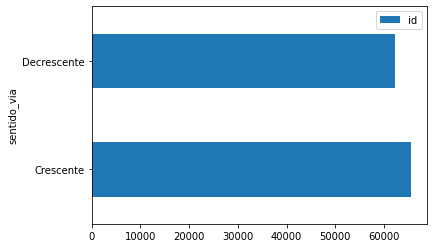

In [127]:
pd.DataFrame(df.groupby(by='sentido_via').count()['id']).sort_values(by='id', ascending=False).plot(kind='barh')

In [128]:
#Tipo via
pd.DataFrame(df.groupby(by='sentido_via').count()['id'])

,id
sentido_via,
Crescente,65446
Decrescente,62199


<AxesSubplot:xlabel='sentido_via'>

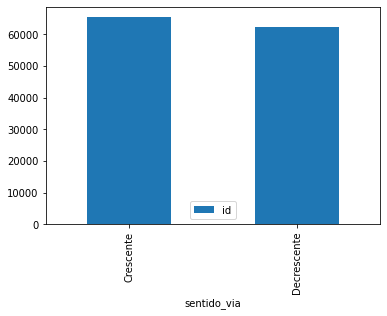

In [129]:
pd.DataFrame(df.groupby(by='sentido_via').count()['id']).plot(kind='bar')

In [130]:
#Traçado via
pd.DataFrame(df.groupby(by='tracado_via').count()['id']).sort_values(by='id', ascending=False)

,id
tracado_via,
Reta,90997
Curva,28319
Cruzamento,8329


<AxesSubplot:ylabel='tracado_via'>

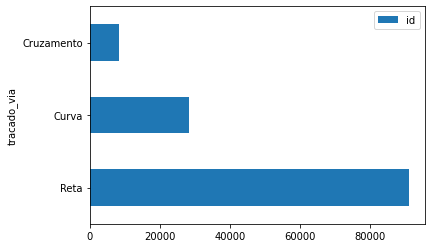

In [131]:
pd.DataFrame(df.groupby(by='tracado_via').count()['id']).sort_values(by='id', ascending=False).plot(kind='barh')

In [132]:
#Uso solo
pd.DataFrame(df.groupby(by='uso_solo').count()['id'])

,id
uso_solo,
Rural,65199
Urbano,62446


<AxesSubplot:ylabel='uso_solo'>

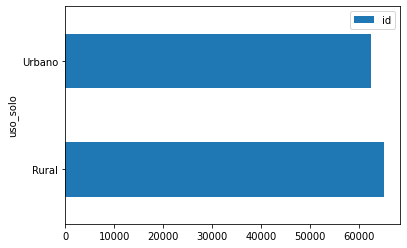

In [133]:
pd.DataFrame(df.groupby(by='uso_solo').count()['id']).plot(kind='barh')

### Vítimas

In [134]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'ocorrencia'],
      dtype='object')

In [164]:
pd.DataFrame(df.groupby(by='uf').sum()['feridos_graves'].sort_values(ascending=False)).head()

,feridos_graves
uf,
MG,4066
SC,2366
RS,1527
GO,1508
RJ,1463


<AxesSubplot:ylabel='uf'>

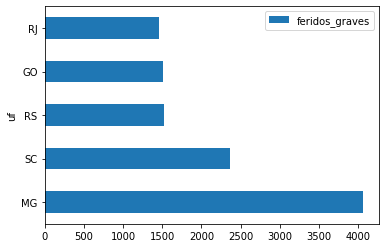

In [181]:
pd.DataFrame(df.groupby(by='uf').sum()['feridos_graves'].sort_values(ascending=False)).head().plot(kind='barh')

In [163]:
pd.DataFrame(df.groupby(by='uf').sum()['feridos_graves'].sort_values(ascending=False)).head().sum()/df['feridos_graves'].sum()


feridos_graves    0.463843
dtype: float64

In [182]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'ocorrencia'],
      dtype='object')

# O que nós queremos saber de fato é, o dia da semana com mais acidentes e em relação aos outros dia, causa, os estados com mais mortos e feridos graves e em relação aos outros e destacar traçado pista. Faça para todos e junte tudo! É PARA SEGUNDA DE MANHÃ! 